### Running Eazy-py on the SHELA  catalogs

In [1]:
%matplotlib inline
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from astropy.table import Table

from astropy.utils.exceptions import AstropyWarning
import warnings
    
np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)

# https://github.com/gbrammer/eazy-py
import eazy

### Prepare catalogs

In [2]:
#load SHELA data
#we could get RA and DEC of likely 

#newfirm data
nhs_path = '/work/03565/stevans/maverick/my_projects/'+ \
'psfex_on_stack/data/processed/combined/cat_v03.fits'
nhs = Table.read(nhs_path)



In [3]:
#print(nhs.colnames)

In [4]:
#append IRAC from Tractor

#load it
irac_tractor_path = '/work/03760/ka_lalit/myvenv/newfirmselected_cat/tractor_irac_newfirmselected_fieldNHS_v0.1.fits'
irac_tractor_tab = Table.read(irac_tractor_path)

In [69]:
#irac_tractor_tab.colnames

In [70]:
#Checking NEWFIRM and TRACTOR catalogs use the same indexing
print(len(irac_tractor_tab) ,len(nhs))
print(irac_tractor_tab[0]['ID'], nhs[0]['NUMBER'])
print(np.where(nhs['NUMBER']==1))

2546337 1660384
0 0
(array([1]),)


In [71]:
#append it
new_colnames = ['flux_ch1','flux_ch2', 'err_ch1','err_ch2']
old_colnames = ['ch1_trflux_uJy','ch2_trflux_uJy','ch1_aper_errflux_uJy',
 'ch2_aper_errflux_uJy']
for nc, oc in zip(new_colnames,old_colnames):
    nhs[nc] = irac_tractor_tab[oc][0:len(nhs)]

In [72]:
mask_field = nhs['FIELD_A'] == 'C3'

In [73]:

cat_now = nhs['NUMBER','RA','DEC',\
              'FLUX_AUTO_corrected_nJy_best','FLUXERR_AUTO_corrected_nJy_best',\
              'flux_ch1','flux_ch2', 'err_ch1','err_ch2'][mask_field]
#nhs['NUMBER','RA','DEC','FLUX_AUTO_corrected_nJy','FLUXERR_AUTO_corrected_nJy']

In [74]:
#cat_now.colnames

In [75]:
#len(cat_now)

In [76]:
#add stuff to path

import sys
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('/work/03565/stevans/maverick/my_projects/decam/code')
import histo_ms as hm
#reload(hm)


sys.path.append('/work/03565/stevans/maverick/my_projects/psfex_on_stack/src')
'''
from ancill import load_and_match_irac
#reload(load_and_match_irac)

irac_cat, irac_d2d = load_and_match_irac.now(cat_now)

mask_irac_sep = irac_d2d.arcsec < 1.0
'''


'\nfrom ancill import load_and_match_irac\n#reload(load_and_match_irac)\n\nirac_cat, irac_d2d = load_and_match_irac.now(cat_now)\n\nmask_irac_sep = irac_d2d.arcsec < 1.0\n'

In [77]:
#irac_cat.colnames

In [78]:
'''
#add IRAC from position matched cataglo (not tractor)
cat_now['flux_ch1'] = irac_cat['F3P6_AUTO']
cat_now['err_ch1'] = irac_cat['F3P6ERR_AUTO']
cat_now['flux_ch2'] = irac_cat['F4P5_AUTO']
cat_now['err_ch2'] = irac_cat['F4P5ERR_AUTO']
cat_now['flux_ch1'][~mask_irac_sep] = -99
cat_now['err_ch1'][~mask_irac_sep] = -99
cat_now['flux_ch2'][~mask_irac_sep] = -99
cat_now['err_ch2'][~mask_irac_sep] = -99
'''

"\n#add IRAC from position matched cataglo (not tractor)\ncat_now['flux_ch1'] = irac_cat['F3P6_AUTO']\ncat_now['err_ch1'] = irac_cat['F3P6ERR_AUTO']\ncat_now['flux_ch2'] = irac_cat['F4P5_AUTO']\ncat_now['err_ch2'] = irac_cat['F4P5ERR_AUTO']\ncat_now['flux_ch1'][~mask_irac_sep] = -99\ncat_now['err_ch1'][~mask_irac_sep] = -99\ncat_now['flux_ch2'][~mask_irac_sep] = -99\ncat_now['err_ch2'][~mask_irac_sep] = -99\n"

In [80]:
#match and append DECam fluxes
from importlib import reload
from ancill import load_and_match_cat

reload(load_and_match_cat)
decam_cat, decam_d2d = load_and_match_cat.now(cat_now, add='DECAMB3')

mask_decam_sep = decam_d2d.arcsec < 1.0


matching...


In [81]:
print(cat_now['RA'][mask_decam_sep][0],decam_cat['RA'][mask_decam_sep][0])
print(cat_now['DEC'][mask_decam_sep][0],decam_cat['DEC'][mask_decam_sep][0])

15.3769454615 15.3769797197
-0.544005400935 -0.544137210443


In [82]:
#decam_cat.colnames

In [83]:
for ii,band in enumerate(['u','g','r','i','z']):
    cat_now['flux_'+band] = decam_cat['AUTO_FLUX'][:,ii]
    cat_now['err_'+band] = decam_cat['AUTO_FLUXE'][:,ii]
    cat_now['flux_'+band][~mask_decam_sep] = -99
    cat_now['err_'+band][~mask_decam_sep] = -99


In [84]:
np.shape(decam_cat['AUTO_FLUX'])

(15407, 5)

In [85]:
decam_cat['AUTO_FLUX'][:,3][1000:1100]

1.8234375
1.08735205078
19.0385410156
3.92961254883
3.44254199219
2.04977124023
0.880242614746
5.96644775391
2.09180126953
1.34425146484
7.18749658203


In [27]:
#match VISTA to NEWFIRM
cat_ancil_path = '/work/03565/stevans/maverick/working/VISTA/VICS82_FULL_SDSS_FEB2017_K22.FITS'

cat_ancil = Table.read(cat_ancil_path)
cat_ancil['RA'] = cat_ancil['ALPHA_J2000']
cat_ancil['DEC'] = cat_ancil['DELTA_J2000']

In [28]:
cat_ancil.colnames

['VICS82ID',
 'ALPHA_J2000',
 'DELTA_J2000',
 'IMAGE',
 'SNR_WIN',
 'MAG_AUTO',
 'MAG_APER',
 'CLASS_STAR',
 'JMAG_AUTO',
 'JMAG_APER',
 'JSNR_WIN',
 'objID',
 'ra',
 'dec',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'modelMagErr_u',
 'modelMagErr_g',
 'modelMagErr_r',
 'modelMagErr_i',
 'modelMagErr_z',
 'SDSS9',
 'DEdeg',
 'cl',
 'q_mode',
 'flags',
 'Q',
 'ObsDate',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'SpObjID',
 'zsp',
 'e_zsp',
 'f_zsp',
 'spType',
 'spCl',
 'subClass',
 'angDist',
 'RA',
 'DEC']

In [29]:
import numpy as np
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

ra=cat_now['RA']
dec = cat_now['DEC']

print("matching...")

smaller_list = (cat_ancil['RA'] > np.min(ra) - 0.1) & (cat_ancil['RA'] < np.max(ra) + 0.1) & \
            (cat_ancil['DEC'] > np.min(dec) - 0.2) & (cat_ancil['DEC'] < np.max(dec) + 0.2)

cat_ancil_short = cat_ancil[smaller_list]
ra_list = cat_ancil_short['RA']
dec_list = cat_ancil_short['DEC']

c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)  
catalog = SkyCoord(ra=ra_list*u.degree, dec=dec_list*u.degree)  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

#idx = idx[0]

#print ra, ra_list_short[idx], dec, dec_list[idx]
#print d2d, flux_df['MASTER_ID'][smaller_list].iloc[idx]

#cat_ancil_sep = d2d.arcsec[0]

close_matches = (d2d.arcsec < 1.2)

#print("matched and appending...")

vista_cat = cat_ancil_short[idx]
vista_d2d = d2d
#return cat_ancil, d2d

matching...


In [86]:
#match and append VISTA fluxes
'''
from importlib import reload
from ancill import load_and_match_cat

reload(load_and_match_cat)
vista_cat, vista_d2d = load_and_match_cat.now(cat_now, add='VISTA')
'''
mask_vista_sep = vista_d2d.arcsec < 1.2

In [87]:
#vista_cat.colnames

In [88]:
#convert vista mag to flux and get errors

def mag2flux(mag_arr, unit='u'):
    if unit == 'n': zp = 31.4 #for nJy
    if unit == 'u': zp = 23.9 #for uJy
    flux_arr = 10. ** ((mag_arr - zp)/(-2.5))
    return flux_arr


In [89]:
band = 'K_vista'
cat_now['flux_'+band] = mag2flux(vista_cat['MAG_AUTO'], unit='u')
cat_now['err_'+band] = cat_now['flux_'+band] / vista_cat['SNR_WIN']
cat_now['flux_'+band][~mask_vista_sep] = -99
cat_now['err_'+band][~mask_vista_sep] = -99
band = 'J_vista'
cat_now['flux_'+band] = mag2flux(vista_cat['JMAG_AUTO'], unit='u')
cat_now['err_'+band] = cat_now['flux_'+band] / vista_cat['JSNR_WIN']
cat_now['flux_'+band][~mask_vista_sep] = -99
cat_now['err_'+band][~mask_vista_sep] = -99

In [90]:
cat_now.colnames

['NUMBER',
 'RA',
 'DEC',
 'FLUX_AUTO_corrected_nJy_best',
 'FLUXERR_AUTO_corrected_nJy_best',
 'flux_ch1',
 'flux_ch2',
 'err_ch1',
 'err_ch2',
 'flux_u',
 'err_u',
 'flux_g',
 'err_g',
 'flux_r',
 'err_r',
 'flux_i',
 'err_i',
 'flux_z',
 'err_z',
 'flux_K_vista',
 'err_K_vista',
 'flux_J_vista',
 'err_J_vista']

In [91]:
cat_now.remove_columns(['RA','DEC'])

In [92]:
cat_now['spec_z'] = -99

In [93]:
new_order = ['NUMBER', 
             'spec_z',
  'flux_u',
 'err_u',
 'flux_g',
 'err_g',
 'flux_r',
 'err_r',
 'flux_i',
 'err_i',
 'flux_z',
 'err_z',
 'FLUX_AUTO_corrected_nJy_best',
 'FLUXERR_AUTO_corrected_nJy_best',
 'flux_K_vista',
 'err_K_vista',
 'flux_J_vista',
 'err_J_vista',
 'flux_ch1',
 'err_ch1',
 'flux_ch2',
 'err_ch2']

cat_new = cat_now[new_order]

In [94]:
cat_new['FLUX_AUTO_corrected_nJy_best'].name = 'flux_K'
cat_new['FLUXERR_AUTO_corrected_nJy_best'].name = 'err_K'

In [95]:
cat_new['flux_K'] /= 1000.
cat_new['err_K'] /= 1000.

In [96]:
print(cat_new)

NUMBER spec_z      flux_u           err_u      ... err_ch1   flux_ch2  err_ch2 
                                               ...                             
------ ------ ---------------- --------------- ... -------- --------- ---------
106692    -99            -99.0           -99.0 ...  2.09492   3.69324   1.67679
106693    -99     2.9970769043  0.196212760751 ...  2.19196   14.6091    2.4805
106694    -99   0.338084533691  0.135533445878 ...  2.24059   40.5808   2.62851
106695    -99  -0.094035484314 0.0990808907241 ...  2.17545   21.6043   2.30212
106696    -99   0.658137207031   0.15366654234 ...  2.89327   30.7694   2.09876
106697    -99            -99.0           -99.0 ... 0.273501 -0.359541  0.731945
106698    -99   0.684188903809  0.145253678462 ...  1.98364   10.6783   1.86735
106699    -99 0.00360486102104  0.114368257023 ...  1.91282   7.91921   2.25212
106700    -99   0.793700012207  0.172695744342 ...  1.62591    4.9089   1.75425
106701    -99    1.59399072266  0.179576

In [97]:
#Save or Load catalog
cat_new.write('../data/interim/C3.flux.vista.irac_trac.decam.fits', overwrite=True)

In [98]:
#print(cat)

In [99]:
# Link templates and filter files 
# EAZYCODE is an environment variable that points to the the eazy-photoz distribution
eazy.symlink_eazy_inputs(path='/work/03565/stevans/maverick/software/eazypy/eazy-photoz', path_is_env=False)

/work/03565/stevans/maverick/software/eazypy/eazy-photoz/templates -> ./templates
/work/03565/stevans/maverick/software/eazypy/eazy-photoz/filters/FILTER.RES.latest -> ./FILTER.RES.latest


In [100]:
#read in filter file:
filters=np.load('FILTER.RES.latest.npy')

In [101]:
filters[0].names()

    1 hst/ACS_update_sep07/wfc_f435w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.3179e+03 AB-Vega=-0.104 w95=993.1
    2 hst/ACS_update_sep07/wfc_f475w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 4.7453e+03 AB-Vega=-0.101 w95=1412.8
    3 hst/ACS_update_sep07/wfc_f555w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.3601e+03 AB-Vega=-0.009 w95=1260.9
    4 hst/ACS_update_sep07/wfc_f606w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 5.9194e+03 AB-Vega= 0.082 w95=2225.4
    5 hst/ACS_update_sep07/wfc_f775w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 7.6933e+03 AB-Vega= 0.385 w95=1490.9
    6 hst/ACS_update_sep07/wfc_f814w_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 8.0599e+03 AB-Vega= 0.419 w95=2359.0
    7 hst/ACS_update_sep07/wfc_f850lp_t77.dat obs_before_7-4-06+rebin-5A lambda_c= 9.0364e+03 AB-Vega= 0.519 w95=2096.6
    8 hst/nicmos_f110w.dat synphot-calcband lambda_c= 1.1234e+04 AB-Vega= 0.725 w95=5536.9
    9 hst/nicmos_f160w.dat synphot-calcband lambda_c= 1.6037e+04 AB-Vega= 1.

In [ ]:
### filter translation file

# Not sure about CTIO_U
trans = """ID id
zz z_spec
flux_CTIO_U      F107
err_CTIO_U       E107
flux_VIMOS_U     F103
err_VIMOS_U      E103
flux_ACS_F435W   F233
err_ACS_F435W    E233
flux_ACS_F606W   F236
err_ACS_F606W    E236
flux_ACS_F775W   F238
err_ACS_F775W    E238
flux_ACS_F814W   F239
err_ACS_F814W    E239
flux_ACS_F850LP  F240
err_ACS_F850LP   E240
flux_WFC3_F098M  F201
err_WFC3_F098M   E201
flux_WFC3_F105W  F202
err_WFC3_F105W   E202
flux_WFC3_F125W  F203
err_WFC3_F125W   E203
flux_WFC3_F160W  F205
err_WFC3_F160W   E205
flux_ISAAC_KS    F37
err_ISAAC_KS     E37
flux_HAWKI_KS    F269
err_HAWKI_KS     E269
flux_IRAC_CH1    F18
err_IRAC_CH1     E18
flux_IRAC_CH2    F19
err_IRAC_CH2     E19
flux_IRAC_CH3    F20
err_IRAC_CH3     E20
flux_IRAC_CH4    F21
err_IRAC_CH4     E21"""

fp = open('../data/interm/zphot.translate.gdss','w')
fp.write(trans)
fp.close()

In [102]:
### filter translation file

trans = """NUMBER id
 spec_z          z_spec
 flux_u          F293
 err_u           E293
 flux_g          F294
 err_g           E294
 flux_r          F295
 err_r           E295
 flux_i          F296
 err_i           E296
 flux_z          F297
 err_z           E297
 flux_K          F134
 err_K           E134
 flux_K_vista    F259
 err_K_vista     E259
 flux_J_vista    F257
 err_J_vista     E257
 flux_ch1        F18
 err_ch1         E18
 flux_ch2        F19
 err_ch2         E191"""

fp = open('../data/interim/zphot.translate.shela','w')
fp.write(trans)
fp.close()

### Run the photo-z fits

In [103]:
# Galactic extinction
EBV = {'aegis':0.0066, 'cosmos':0.0148, 'goodss':0.0069, 'uds':0.0195, 'goodsn':0.0103}['goodss']
    
#roots = ['../data/raw/CANDELS_GDSS_workshop', '../data/raw/CANDELS_GDSS_workshop_z1'][:1]
roots = ['../data/interim/C3', '../data/raw/CANDELS_GDSS_workshop_z1'][:1]

for root in roots:
    print('\n####\n')
    params = {}

    params['CATALOG_FILE'] = '{0}.flux.vista.irac_trac.decam.fits'.format(root)
    params['MAIN_OUTPUT_FILE'] = '{0}.vista.irac_trac.decam.eazypy'.format(root)

    params['PRIOR_FILTER'] = 205
    params['PRIOR_ABZP'] = 25
    params['MW_EBV'] = EBV

    params['Z_MAX'] = 12
    params['Z_STEP'] = 0.01

    params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
    
    params['VERBOSITY'] = 1
    
    ez = eazy.photoz.PhotoZ(param_file=None,
                              translate_file='../data/interim/zphot.translate.shela',
                              zeropoint_file=None, params=params,
                              load_prior=False, load_products=False, n_proc=-1)

    for iter in range(2):
      ez.fit_parallel(n_proc=15)
      ez.error_residuals()

    print('Get physical parameters')
    ez.standard_output()


####

Read default param file: /work/03565/stevans/maverick/software/anaconda3/envs/eazypy/lib/python3.5/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: ../data/interim/C3.flux.vista.irac_trac.decam.fits
flux_u err_u (293): DECam/DECam_u.txt
flux_g err_g (294): DECam/DECam_g.txt
flux_r err_r (295): DECam/DECam_r.txt
flux_i err_i (296): DECam/DECam_i.txt
flux_z err_z (297): DECam/DECam_z.txt
flux_K err_K (134): NEWFIRM/k_atmos.dat
flux_K_vista err_K_vista (259): VISTA/Ks_system+atmos.dat
flux_J_vista err_J_vista (257): VISTA/J_system+atmos.dat
flux_ch1 err_ch1 ( 18): IRAC/irac_tr1_2004-08-09.dat
flux_ch2 err_ch2 ( 19): IRAC/irac_tr2_2004-08-09.dat
Process template tweak_fsps_QSF_12_v3_001.dat.
Process template tweak_fsps_QSF_12_v3_002.dat.
Process template tweak_fsps_QSF_12_v3_003.dat.
Process template tweak_fsps_QSF_12_v3_004.dat.
Process template tweak_fsps_QSF_12_v3_005.dat.
Process template tweak_fsps_QSF_12_v3_006.dat.
Process template tweak_fsps_QSF_12_v3_007.dat.


In [104]:
# Outputs for the catalog
zout = Table.read('{0}.zout.fits'.format(params['MAIN_OUTPUT_FILE']))
zout['ssfr'] = zout['SFR']/zout['mass']
print(zout.colnames)

['id', 'z_spec', 'nusefilt', 'numpeaks', 'z_phot', 'z_phot_chi2', 'z_phot_risk', 'z_min_risk', 'min_risk', 'z_chi2_noprior', 'chi2_noprior', 'z025', 'z160', 'z500', 'z840', 'z975', 'restU', 'restU_err', 'restB', 'restB_err', 'restV', 'restV_err', 'restJ', 'restJ_err', 'Lv', 'MLv', 'Av', 'mass', 'SFR', 'LIR', 'line_flux_Ha', 'line_EW_Ha', 'line_flux_O3', 'line_EW_O3', 'line_flux_Hb', 'line_EW_Hb', 'line_flux_O2', 'line_EW_O2', 'line_flux_Lya', 'line_EW_Lya', 'ssfr']


In [51]:
mask_k = cat_new['flux_K']/cat_new['err_K'] > 5
zout_copy = zout.copy()


### Diagnostic plots

In [ ]:
fig = ez.zphot_zspec(zmin=0.7, zmax=1.4, minor=0.1, skip=0)

(1, 5)

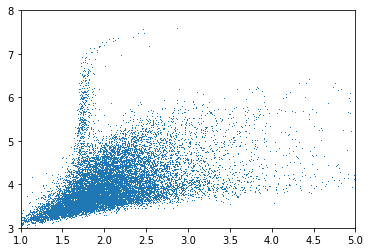

In [52]:
#select stars:
mask_field2 = nhs['FIELD_A'] == 'C3'
plt.plot(nhs['FLUX_RADIUS'][mask_field2],np.log10(nhs['FLUX_AUTO_corrected_nJy_best'][mask_field2]),',')
plt.ylim(3,8)
plt.xlim(1,5)

In [53]:
#remove bright stars:
#let's not remove them by flux v size b/c EAZy should remove them by color.
sys.path.append('/work/03565/stevans/maverick/my_projects')
dat = nhs[mask_field]

field = 'C3'
import psfex_on_stack.src.star_selection.define_field_para_copy as dfp
cut,ylimit = dfp.now(field, '-PS', '-post-inspect')
#print("parameter cuts: ", cut)
mask_stars = ((np.log10(abs(dat['FLUX_AUTO_corrected_nJy_best'])) > 4.7)
#& (np.log10(abs(dat['FLUX_APER'])) > cut[1]) 
& (dat['FLUX_RADIUS'] < cut[2]) 
& (dat['IMAFLAGS_ISO'] == 0)
& (dat['FLUX_RADIUS'] > cut[3]))

define_field_para.py ran.


In [54]:
mask_ssfr = np.log10(zout_copy['ssfr']) < -11
mask_z = (zout_copy['z_phot'] > 3) & (zout_copy['z_phot'] < 5)

In [55]:
zout = zout_copy[mask_k & mask_z]

In [56]:
len(zout)

1498

In [57]:
### UVJ
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])

uverr = 2.5*np.sqrt((zout['restU_err']/zout['restU'])**2+(zout['restV_err']/zout['restV'])**2)
vjerr = 2.5*np.sqrt((zout['restV_err']/zout['restV'])**2+(zout['restJ_err']/zout['restJ'])**2)

/work/03565/stevans/maverick/software/anaconda3/envs/eazypy/lib/python3.5/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/work/03565/stevans/maverick/software/anaconda3/envs/eazypy/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


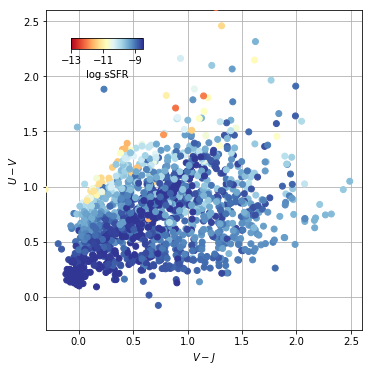

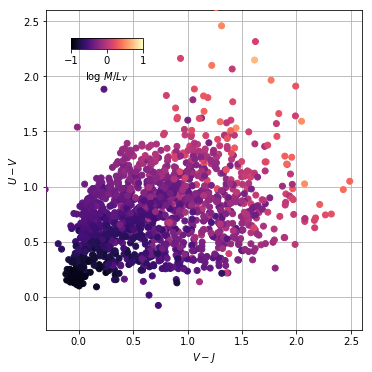

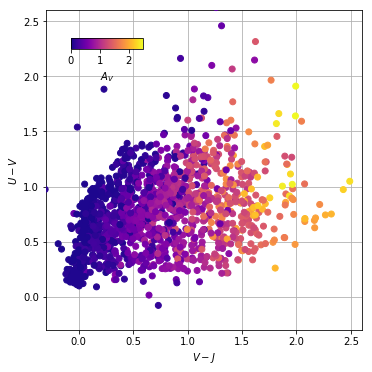

In [58]:
for show in ['ssfr', 'MLv', 'Av']:
    
    fig = plt.figure(figsize=[5,5])
    
    ax = fig.add_subplot(111)
    ax.errorbar(vj, uv, xerr=0, yerr=0, color='k', 
                alpha=0.1, marker='.', capsize=0, linestyle='None')
    
    if show == 'ssfr':
        sc = ax.scatter(vj, uv, c=np.log10(zout['ssfr']), 
                        vmin=-13, vmax=-8.5, zorder=10, cmap='RdYlBu')
        label = 'log sSFR'
        ticks = np.arange(-13,-8,2)
    
    elif show == 'MLv':
        sc = ax.scatter(vj, uv, c=np.log10(zout['MLv']), 
                        vmin=-1, vmax=1, zorder=10, cmap='magma')
        label = r'$\log\ M/L_V$'
        ticks = np.arange(-1,1.1,1)

    elif show == 'Av':
        sc = ax.scatter(vj, uv, c=zout['Av'], vmin=0, 
                        vmax=2.5, zorder=10, cmap='plasma')
        label = r'$A_V$'
        ticks = np.arange(0,2.1,1)
    
    # Colorbar
    cax = fig.add_axes((0.18, 0.88, 0.2, 0.03))
    cb = plt.colorbar(sc, cax=cax, orientation='horizontal')
    cb.set_label(label)
    cb.set_ticks(ticks)
    
    ax.set_xlim(-0.3, 2.6)
    ax.set_ylim(-0.3, 2.6)
    
    ax.grid()
    
    ax.set_xlabel(r'$V-J$'); ax.set_ylabel(r'$U-V$')
    #ax.set_title('Riverside z=1 sample')
    
    fig.tight_layout(pad=0.1)
    
    #plt.savefig('Riverside_z1_{0}.pdf'.format(show))

In [59]:
mask_ssfr = np.log10(zout_copy['ssfr']) < -11
mask_z = zout_copy['z_phot'] > 3

In [60]:
mask_inspect = mask_ssfr & mask_k & mask_z

In [61]:
print(np.sum(mask_inspect))

42


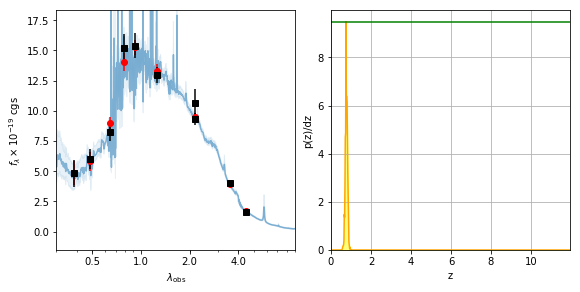

In [62]:
# Show SED
id_i = ez.cat['id'][4]
fig = ez.show_fit(id_i, show_fnu=0)

In [63]:
mag2flux(21.9,unit='u')

6.309573444801933

In [64]:
ez.cat.colnames

['NUMBER',
 'spec_z',
 'flux_u',
 'err_u',
 'flux_g',
 'err_g',
 'flux_r',
 'err_r',
 'flux_i',
 'err_i',
 'flux_z',
 'err_z',
 'flux_K',
 'err_K',
 'flux_K_vista',
 'err_K_vista',
 'flux_J_vista',
 'err_J_vista',
 'flux_ch1',
 'err_ch1',
 'flux_ch2',
 'err_ch2',
 'id',
 'z_spec',
 'F293',
 'E293',
 'F294',
 'E294',
 'F295',
 'E295',
 'F296',
 'E296',
 'F297',
 'E297',
 'F134',
 'E134',
 'F259',
 'E259',
 'F257',
 'E257',
 'F18',
 'E18',
 'F19',
 'E19']

/work/03565/stevans/maverick/software/anaconda3/envs/eazypy/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


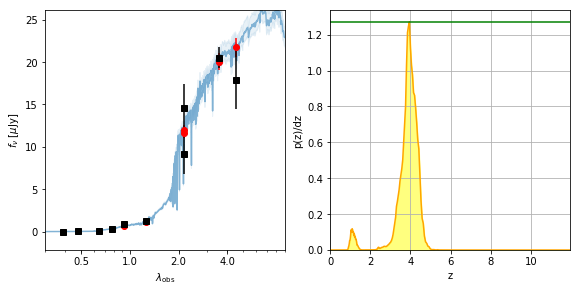

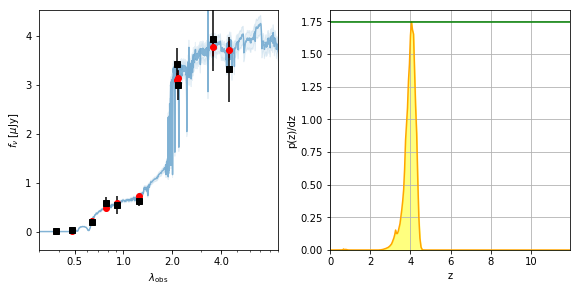

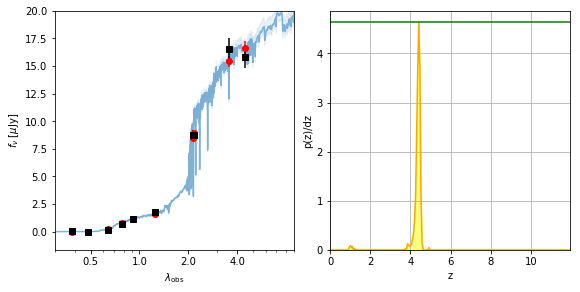

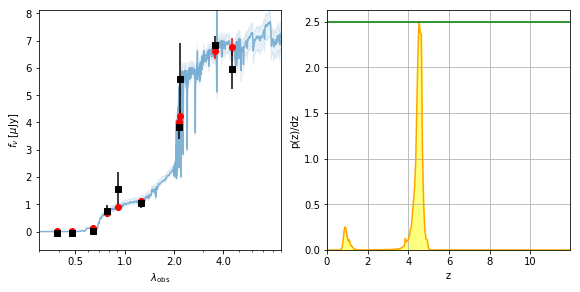

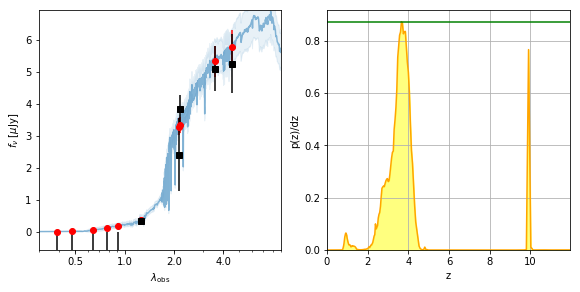

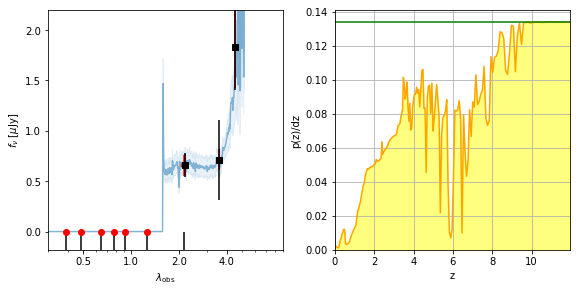

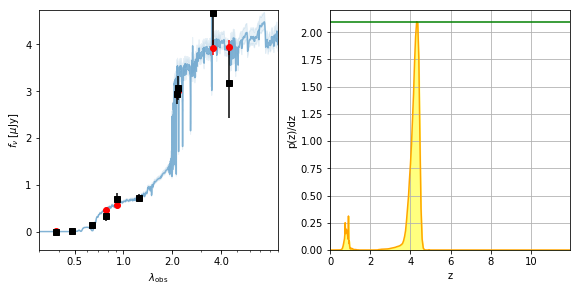

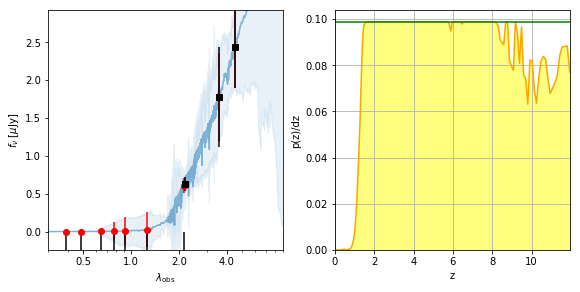

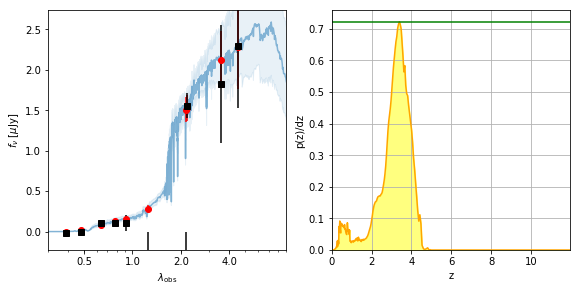

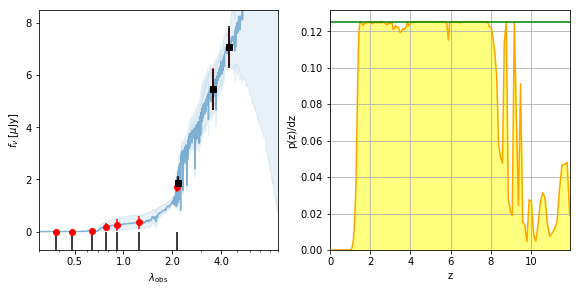

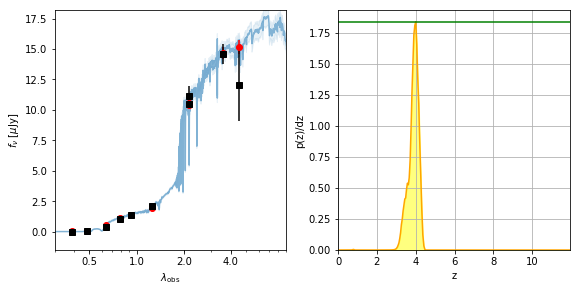

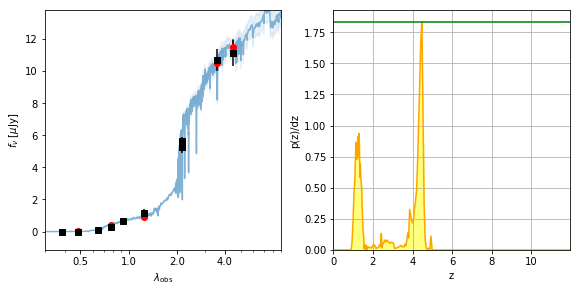

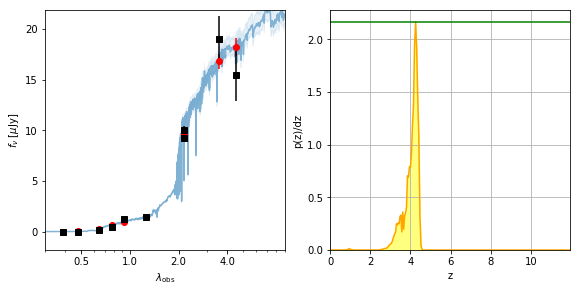

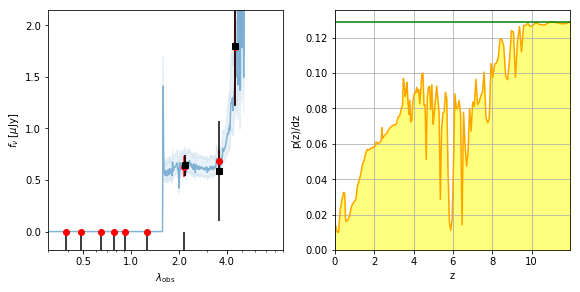

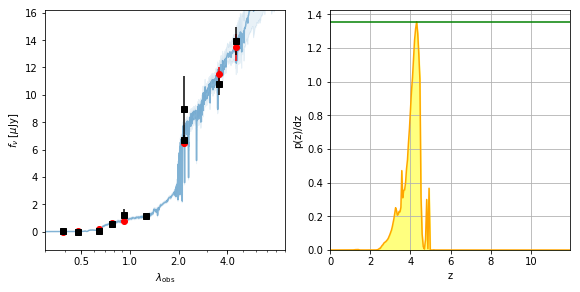

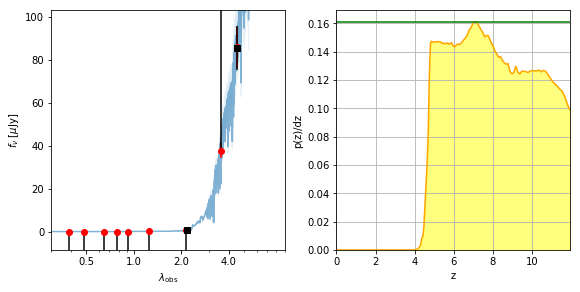

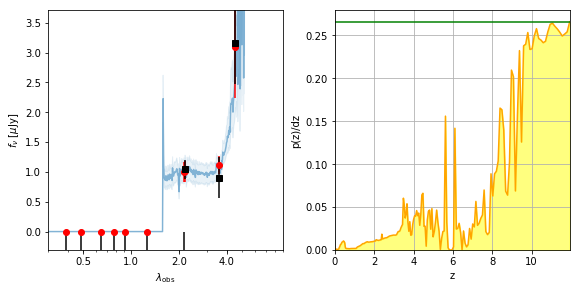

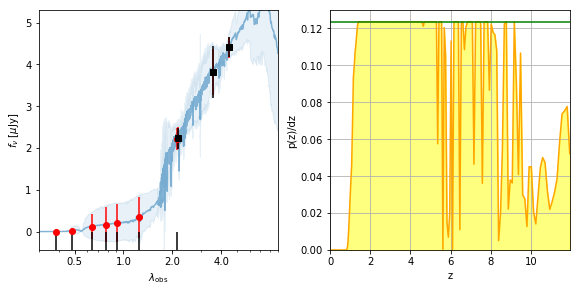

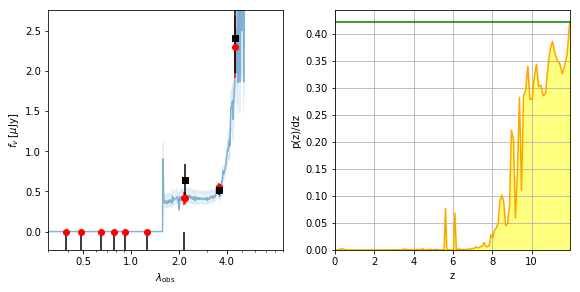

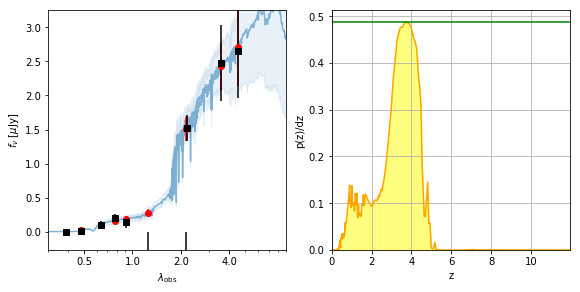

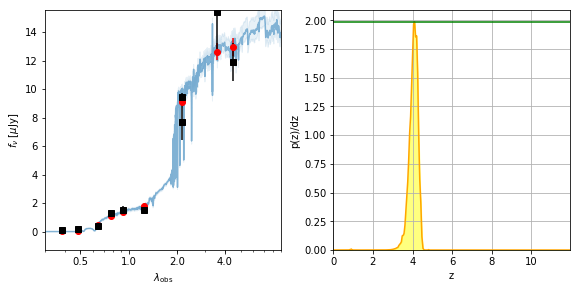

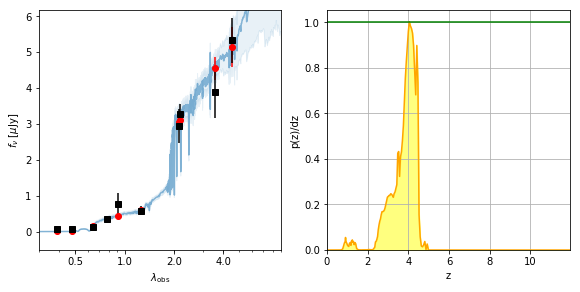

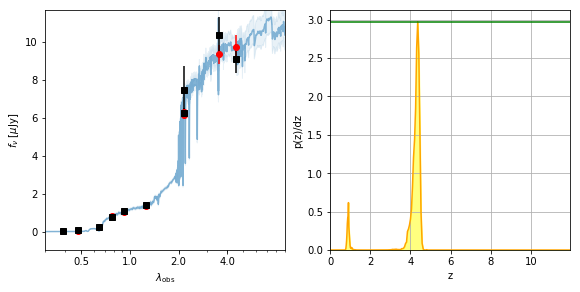

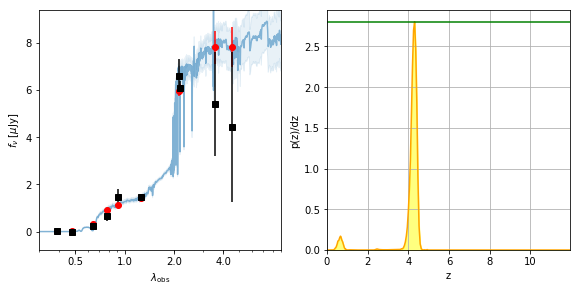

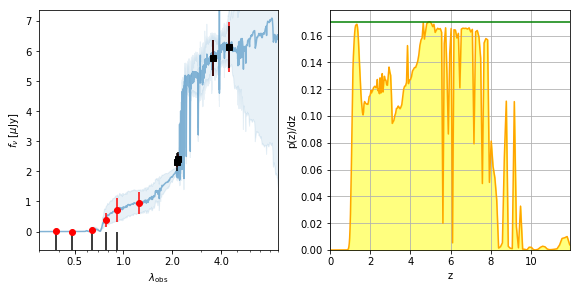

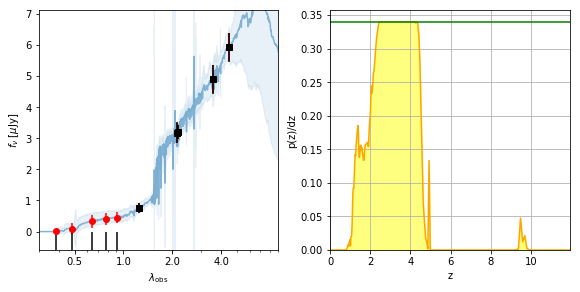

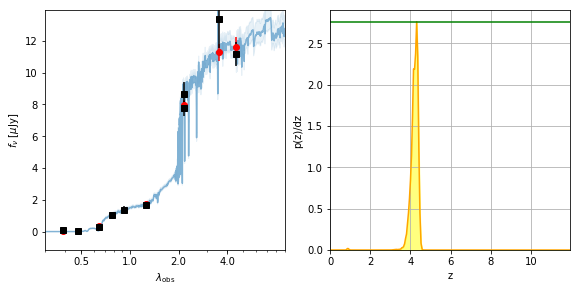

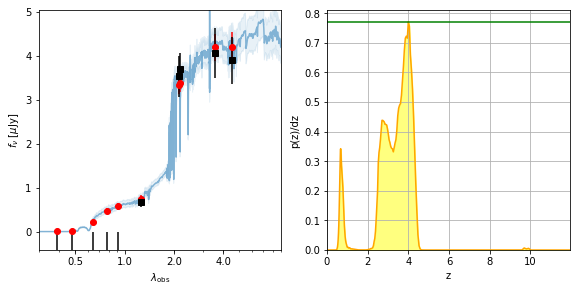

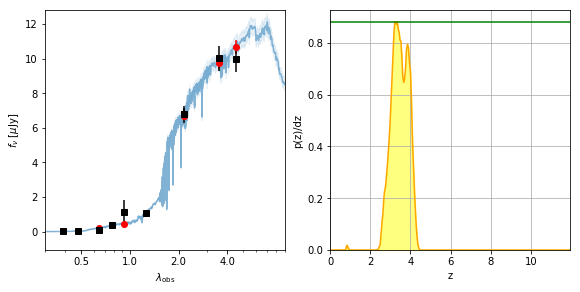

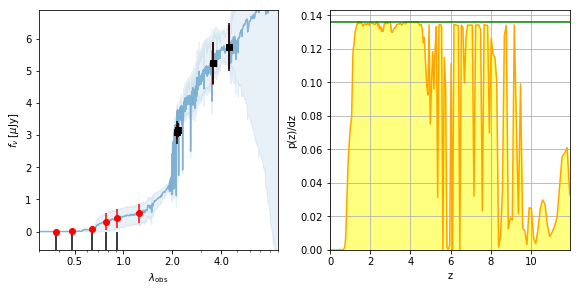

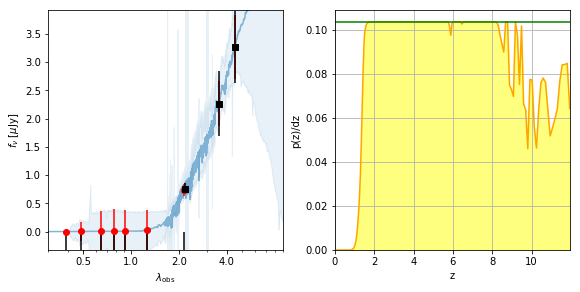

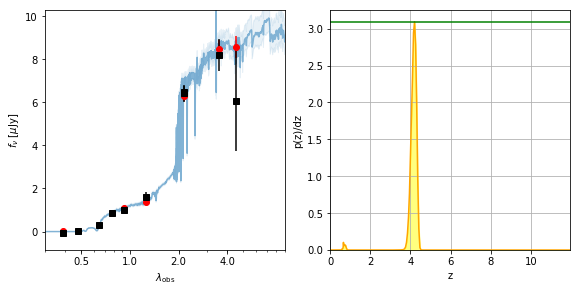

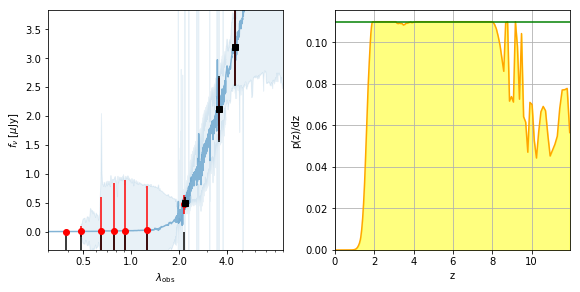

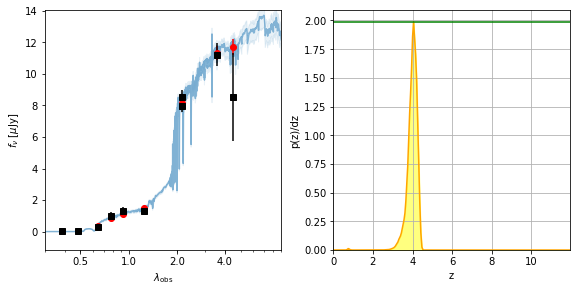

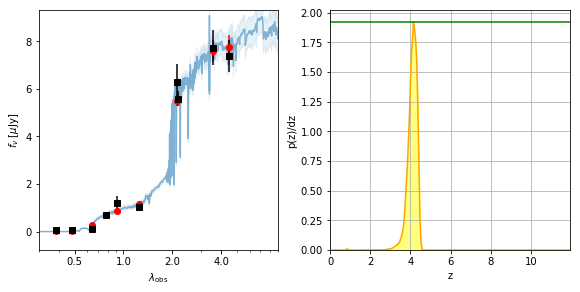

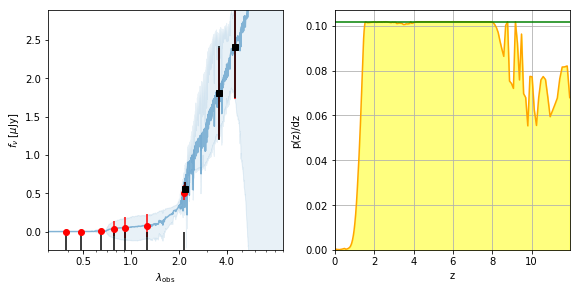

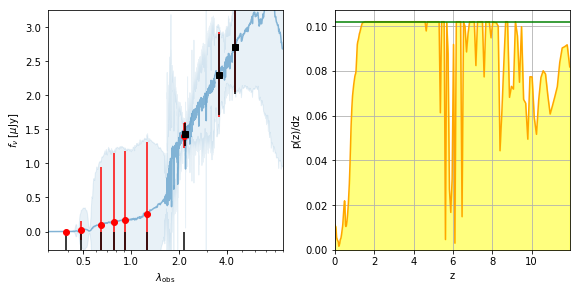

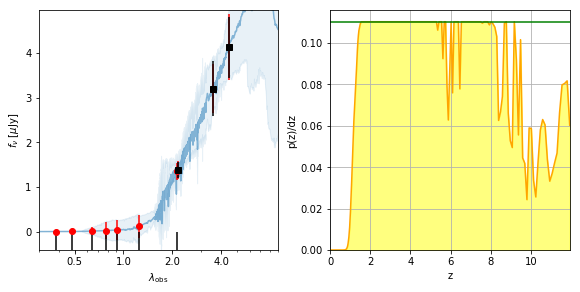

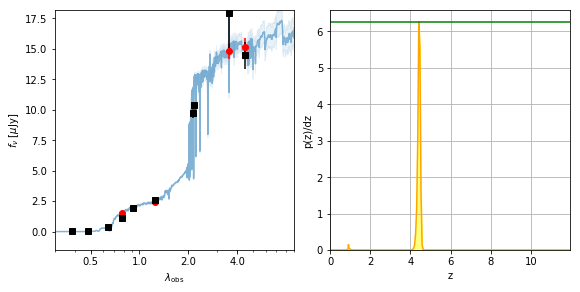

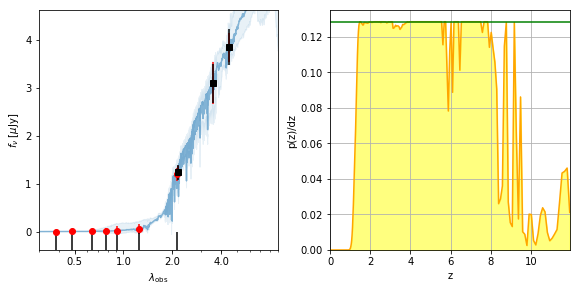

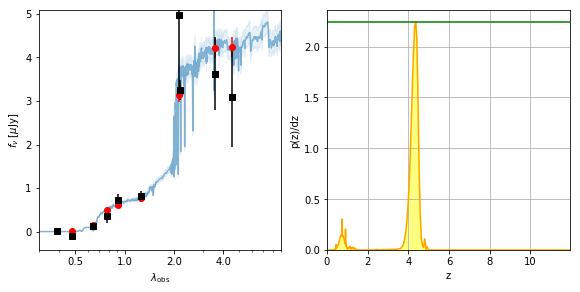

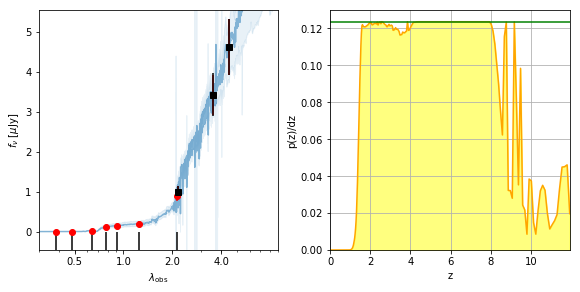

In [65]:
# Show SED
for id_i,fj,ej in zip(ez.cat['id'][mask_inspect],ez.cat['flux_J_vista'][mask_inspect],ez.cat['err_J_vista'][mask_inspect]):
    fig = ez.show_fit(id_i, show_fnu=1)
    #print(fj,fj/ej)

In [ ]:
# Show SED
id_i = ez.cat['id'][4]
fig = ez.show_fit(id_i, show_fnu=0)

In [ ]:
# nu-Fnu scaling for far-IR 
fig = ez.show_fit(id_i, show_fnu=2)

fig.axes[0].set_xlim(0.2, 1200)
fig.axes[0].set_ylim(1, 100)
fig.axes[0].loglog()
fig.axes[0].set_xticklabels([0.1, 1, 10, 100, 1000])
fig.axes[1].set_xlim(0, 2)